#### References. https://github.com/rjurney/Agile_Data_Code_2

Intialize PySpark

In [10]:
from pyspark.sql import SparkSession


# Initialize PySpark with MongoDB support
APP_NAME = "Introducing PySpark"
spark = (
    SparkSession.builder.appName(APP_NAME)
    # Load support for MongoDB and Elasticsearch
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1,org.elasticsearch:elasticsearch-spark-30_2.12:7.14.2")
    # Add Configuration for MongopDB
    .config("spark.mongodb.input.uri", "mongodb://mongo:27017/test.coll")
    .config("spark.mongodb.output.uri", "mongodb://mongo:27017/test.coll")

    .getOrCreate()
)
sc = spark.sparkContext
sc.setLogLevel("ERROR")

print("\nPySpark initialized...")


PySpark initialized...


In [33]:
# Load the parquet file containing flight delay records
on_time_df = spark.read.parquet('data/on_time_performance.parquet')

# Register the data for Spark SQL
on_time_df.registerTempTable("on_time_performance")

# Check out the columns
on_time_df.columns

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Carrier',
 'TailNum',
 'FlightNum',
 'Origin',
 'OriginCityName',
 'OriginState',
 'Dest',
 'DestCityName',
 'DestState',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'TaxiOut',
 'TaxiIn',
 'WheelsOff',
 'WheelsOn',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'Cancelled',
 'Diverted',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'CRSDepTime',
 'CRSArrTime']

In [34]:
# select field and get result
trimmed_on_time = on_time_df.select("FlightDate", 
                                           "TailNum", 
                                           "Origin", 
                                           "Dest",
                                           "Carrier",
                                           "DepDelay",
                                           "ArrDelay")
trimmed_on_time.sample(False, 0.0001).show(10)
sampled_ten_percent = trimmed_on_time.sample(False, 0.1)
sampled_ten_percent.show(10)
                                           

+----------+-------+------+----+-------+--------+--------+
|FlightDate|TailNum|Origin|Dest|Carrier|DepDelay|ArrDelay|
+----------+-------+------+----+-------+--------+--------+
|2015-01-10| N26549|   IAH| GPT|     EV|    -2.0|    -1.0|
|2015-01-10| N17245|   LAX| SFO|     UA|    10.0|   -11.0|
|2015-01-10| N446WN|   HOU| MCO|     WN|    17.0|    16.0|
|2015-01-11| N732SK|   DEN| ASE|     OO|    null|    null|
|2015-01-11| N38257|   LAS| SFO|     UA|     2.0|    10.0|
|2015-01-12| N321US|   MIA| ATL|     DL|    -1.0|    -1.0|
|2015-01-12| N8310C|   BDL| FLL|     WN|    -7.0|   -21.0|
|2015-01-13| N339JB|   BOS| EWR|     B6|    -1.0|   -10.0|
|2015-01-13| N952DN|   LAS| MSP|     DL|    -3.0|   -13.0|
|2015-01-14| N937SW|   DEN| SGU|     OO|    -3.0|   -16.0|
+----------+-------+------+----+-------+--------+--------+
only showing top 10 rows

+----------+-------+------+----+-------+--------+--------+
|FlightDate|TailNum|Origin|Dest|Carrier|DepDelay|ArrDelay|
+----------+-------+------+---

In [35]:
fd = on_time_df.select("AirTime", "Distance")
fd.show(10)

+-------+--------+
|AirTime|Distance|
+-------+--------+
|   59.0|   432.0|
|   77.0|   432.0|
|  129.0|   802.0|
|   93.0|   731.0|
|  111.0|   769.0|
|  108.0|   769.0|
|  146.0|  1047.0|
|   null|  1007.0|
|   null|  1007.0|
|   null|   802.0|
+-------+--------+
only showing top 10 rows



In [14]:
hourly_fd = fd.select((fd.AirTime/60).alias('Hours'), "Distance")
hourly_fd.show(5)

+------------------+--------+
|             Hours|Distance|
+------------------+--------+
|0.9833333333333333|   432.0|
|1.2833333333333334|   432.0|
|              2.15|   802.0|
|              1.55|   731.0|
|              1.85|   769.0|
+------------------+--------+
only showing top 5 rows



In [15]:
miles_per_hour = hourly_fd.select((hourly_fd.Distance/hourly_fd.Hours).alias('Mph'))
miles_per_hour.show(10)          

+------------------+
|               Mph|
+------------------+
| 439.3220338983051|
| 336.6233766233766|
| 373.0232558139535|
|471.61290322580646|
| 415.6756756756757|
|427.22222222222223|
| 430.2739726027398|
|              null|
|              null|
|              null|
+------------------+
only showing top 10 rows



In [16]:
fd.select("AirTime",(fd.AirTime/60).alias('Hours'), "Distance").show()

+-------+------------------+--------+
|AirTime|             Hours|Distance|
+-------+------------------+--------+
|   59.0|0.9833333333333333|   432.0|
|   77.0|1.2833333333333334|   432.0|
|  129.0|              2.15|   802.0|
|   93.0|              1.55|   731.0|
|  111.0|              1.85|   769.0|
|  108.0|               1.8|   769.0|
|  146.0| 2.433333333333333|  1047.0|
|   null|              null|  1007.0|
|   null|              null|  1007.0|
|   null|              null|   802.0|
|   null|              null|   731.0|
|  122.0| 2.033333333333333|   731.0|
|   94.0|1.5666666666666667|   731.0|
|   91.0|1.5166666666666666|   731.0|
|  115.0|1.9166666666666667|   731.0|
|   89.0|1.4833333333333334|   731.0|
|  106.0|1.7666666666666666|   721.0|
|   94.0|1.5666666666666667|   748.0|
|   null|              null|   733.0|
|   null|              null|   733.0|
+-------+------------------+--------+
only showing top 20 rows



null값 처리

In [36]:
fd = on_time_df.select("AirTime", "Distance")
filled_fd = fd.filter(fd.AirTime.isNotNull())
hourly_fd = filled_fd.select("AirTime", (filled_fd.AirTime/60).alias('Hours'),"Distance")
mph = hourly_fd.select((hourly_fd.Distance/hourly_fd.Hours).alias('Mph'))
mph.show(10)

+------------------+
|               Mph|
+------------------+
| 439.3220338983051|
| 336.6233766233766|
| 373.0232558139535|
|471.61290322580646|
| 415.6756756756757|
|427.22222222222223|
| 430.2739726027398|
| 359.5081967213115|
|466.59574468085106|
|  481.978021978022|
+------------------+
only showing top 10 rows



In [18]:
from pyspark.sql.functions import avg
mph.select(avg(mph.Mph)).show()

+------------------+
|          avg(Mph)|
+------------------+
|408.72370268222824|
+------------------+



In [37]:
on_time_df.registerTempTable("on_time_performance")
mph = spark.sql("""
SELECT (Distance/(AirTime/60)) AS Mph
FROM on_time_performance
WHERE AirTime IS NOT NULL
ORDER BY AirTime
""")
mph.show(10)
mph.registerTempTable("mph")
spark.sql("SELECT AVG(Mph) from mph").show()

+-----------------+
|              Mph|
+-----------------+
|265.7142857142857|
|265.7142857142857|
|265.7142857142857|
|265.7142857142857|
|265.7142857142857|
|265.7142857142857|
|265.7142857142857|
|            232.5|
|            232.5|
|            232.5|
+-----------------+
only showing top 10 rows



+-----------------+
|         avg(Mph)|
+-----------------+
|408.7237026822374|
+-----------------+



Histogram

In [21]:
mph.select("Mph").rdd.flatMap(lambda x:x).histogram(10)

([32.34375,
  107.89626024590164,
  183.4487704918033,
  259.0012807377049,
  334.5537909836066,
  410.10630122950823,
  485.65881147540983,
  561.2113217213115,
  636.7638319672132,
  712.3163422131148,
  787.8688524590165],
 [174, 14255, 148314, 643901, 1861699, 2357002, 664609, 23997, 32, 25])

<BarContainer object of 10 artists>

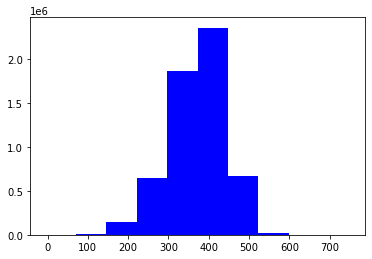

In [25]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def draw_histogram(rdd_histogram_data):
    height=np.array(rdd_histogram_data[1])
    full_bins = rdd_histogram_data[0]
    mid_point_bins = full_bins[:-1]
    widths = [abs(i-j) for i, j in zip(full_bins[:-1], full_bins[1:])]
    bar = plt.bar(mid_point_bins, height, width=widths, color='b')
    return bar

departure_delay_histogram = mph.select("Mph").rdd.flatMap(lambda x:x).histogram(10)
draw_histogram(departure_delay_histogram)

<BarContainer object of 20 artists>

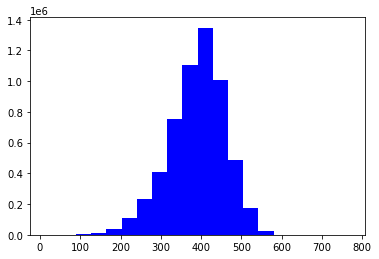

In [27]:
departure_delay_histogram = mph.select("Mph").rdd.flatMap(lambda x:x).histogram(20)
draw_histogram(departure_delay_histogram)

In [38]:
tail_numbers = on_time_df.rdd.map(lambda x:x.TailNum).filter(lambda x:x!='' and x is not None)
unique_tail_numbers = tail_numbers.distinct()
airplane_count = unique_tail_numbers.count()
print(f"Total Airplanes: {airplane_count}")

Total Airplanes: 4897


In [39]:
origin_hour_dist = on_time_dataframe.filter(on_time_df.AirTime.isNotNull()).select("Origin", (on_time_dataframe.AirTime/60).alias("Hours"), "Distance")
mph_origins = origin_hour_dist.select("Origin", (origin_hour_dist.Distance/origin_hour_dist.Hours).alias("Mph"))
mph_origins.registerTempTable("mph_origins")
avg_speeds = mph_origins.groupBy("Origin").agg({"Mph":"avg"}).alias("Mph")
avg_speeds.show()

AnalysisException: Resolved attribute(s) AirTime#517 missing from Year#210,Quarter#211,Month#212,DayofMonth#213,DayOfWeek#214,FlightDate#215,Carrier#216,TailNum#217,FlightNum#218,Origin#219,OriginCityName#220,OriginState#221,Dest#222,DestCityName#223,DestState#224,DepTime#225,DepDelay#226,DepDelayMinutes#227,TaxiOut#228,TaxiIn#229,WheelsOff#230,WheelsOn#231,ArrTime#232,ArrDelay#233,ArrDelayMinutes#234,Cancelled#235,Diverted#236,ActualElapsedTime#237,AirTime#238,Flights#239,Distance#240,CarrierDelay#241,WeatherDelay#242,NASDelay#243,SecurityDelay#244,LateAircraftDelay#245,CRSDepTime#246,CRSArrTime#247 in operator !Filter isnotnull(AirTime#517). Attribute(s) with the same name appear in the operation: AirTime. Please check if the right attribute(s) are used.;
!Filter isnotnull(AirTime#517)
+- Relation [Year#210,Quarter#211,Month#212,DayofMonth#213,DayOfWeek#214,FlightDate#215,Carrier#216,TailNum#217,FlightNum#218,Origin#219,OriginCityName#220,OriginState#221,Dest#222,DestCityName#223,DestState#224,DepTime#225,DepDelay#226,DepDelayMinutes#227,TaxiOut#228,TaxiIn#229,WheelsOff#230,WheelsOn#231,ArrTime#232,ArrDelay#233,... 14 more fields] parquet


In [ ]:
on_time_df.columns